In [1]:
import sys
sys.path.append('..')

from utils.common import read_beacon_coords, read_beacon_data, process_beacon_data, process_beacon_data_for_pos
import argparse
import pandas as pd

args = argparse.Namespace(beacon_coords_file='../data/beacon_coords.txt', beacon_data_file='../data/bluetoothData.txt', update_frequency=10)

actual_coords = read_beacon_coords(args.beacon_coords_file)
beacon_data = read_beacon_data(args.beacon_data_file)
print("beacon_data", beacon_data)
print(type(beacon_data))


# actual_coords_df = pd.DataFrame(actual_coords)

# # Convert beacon_data to a DataFrame
# beacon_data_df = pd.DataFrame(beacon_data)

# print("Actual Coordinates DataFrame:")
# print(actual_coords_df)
# print(actual_coords_df.dtypes)

# print("\nBeacon Data DataFrame:")
# print(beacon_data_df)
# print(beacon_data_df.dtypes)


beacon_data [[{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -64, 'accuracy': 16.658868643737616, 'time': 1724118766615}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -64, 'accuracy': 16.658868643737616, 'time': 1724118767220}, {'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -59, 'accuracy': 7.721894863531677, 'time': 1724118767220}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -62, 'accuracy': 12.296376053275772, 'time': 1724118767853}, {'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -59, 'accuracy': 7.721894863531677, 'time': 1724118767853}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -73, 'accuracy': 60.184995180183634, 'time': 1724118768900}, {'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -62, 'accuracy': 12.296376053275772, 'time': 1724118768900}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -64, 'accuracy': 16.658868643737616, 'time': 1724118769534}, {'uuid': '1a040000-0000-0000-0000-00

Interval between data 0 and 1: 0.60 seconds
Interval between data 1 and 2: 0.63 seconds
Interval between data 2 and 3: 1.05 seconds
Interval between data 3 and 4: 0.63 seconds
Interval between data 4 and 5: 0.52 seconds
Interval between data 5 and 6: 0.53 seconds
Interval between data 6 and 7: 0.63 seconds
Interval between data 7 and 8: 0.55 seconds
Interval between data 8 and 9: 0.71 seconds
Interval between data 9 and 10: 0.55 seconds
Interval between data 10 and 11: 0.63 seconds
Interval between data 11 and 12: 0.83 seconds
Interval between data 12 and 13: 0.61 seconds
Interval between data 13 and 14: 0.53 seconds
Interval between data 14 and 15: 0.63 seconds
Interval between data 15 and 16: 0.63 seconds
Interval between data 16 and 17: 0.55 seconds
Interval between data 17 and 18: 0.74 seconds
Interval between data 18 and 19: 0.61 seconds
Interval between data 19 and 20: 1.58 seconds
Interval between data 20 and 21: 0.54 seconds
Interval between data 21 and 22: 0.74 seconds
Interva

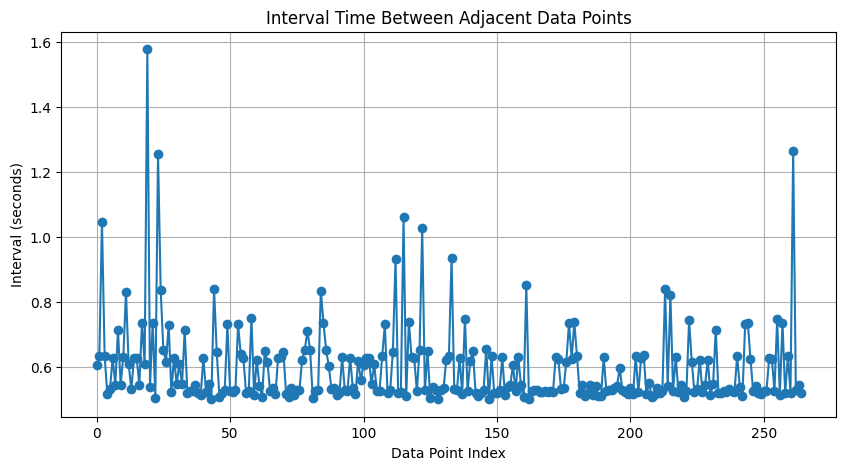

Average interval: 0.60 seconds
Minimum interval: 0.50 seconds
Maximum interval: 1.58 seconds


In [2]:
import matplotlib.pyplot as plt

intervals = []
for i in range(len(beacon_data) - 1):
    current_time = beacon_data[i][0]['time']
    next_time = beacon_data[i+1][0]['time']
    interval = (next_time - current_time) / 1000  # Convert milliseconds to seconds
    intervals.append(interval)
    print(f"Interval between data {i} and {i+1}: {interval:.2f} seconds")

plt.figure(figsize=(10, 5))
plt.plot(range(len(intervals)), intervals, marker='o')
plt.title('Interval Time Between Adjacent Data Points')
plt.xlabel('Data Point Index')
plt.ylabel('Interval (seconds)')
plt.grid(True)
plt.show()

print(f"Average interval: {sum(intervals) / len(intervals):.2f} seconds")
print(f"Minimum interval: {min(intervals):.2f} seconds")
print(f"Maximum interval: {max(intervals):.2f} seconds")

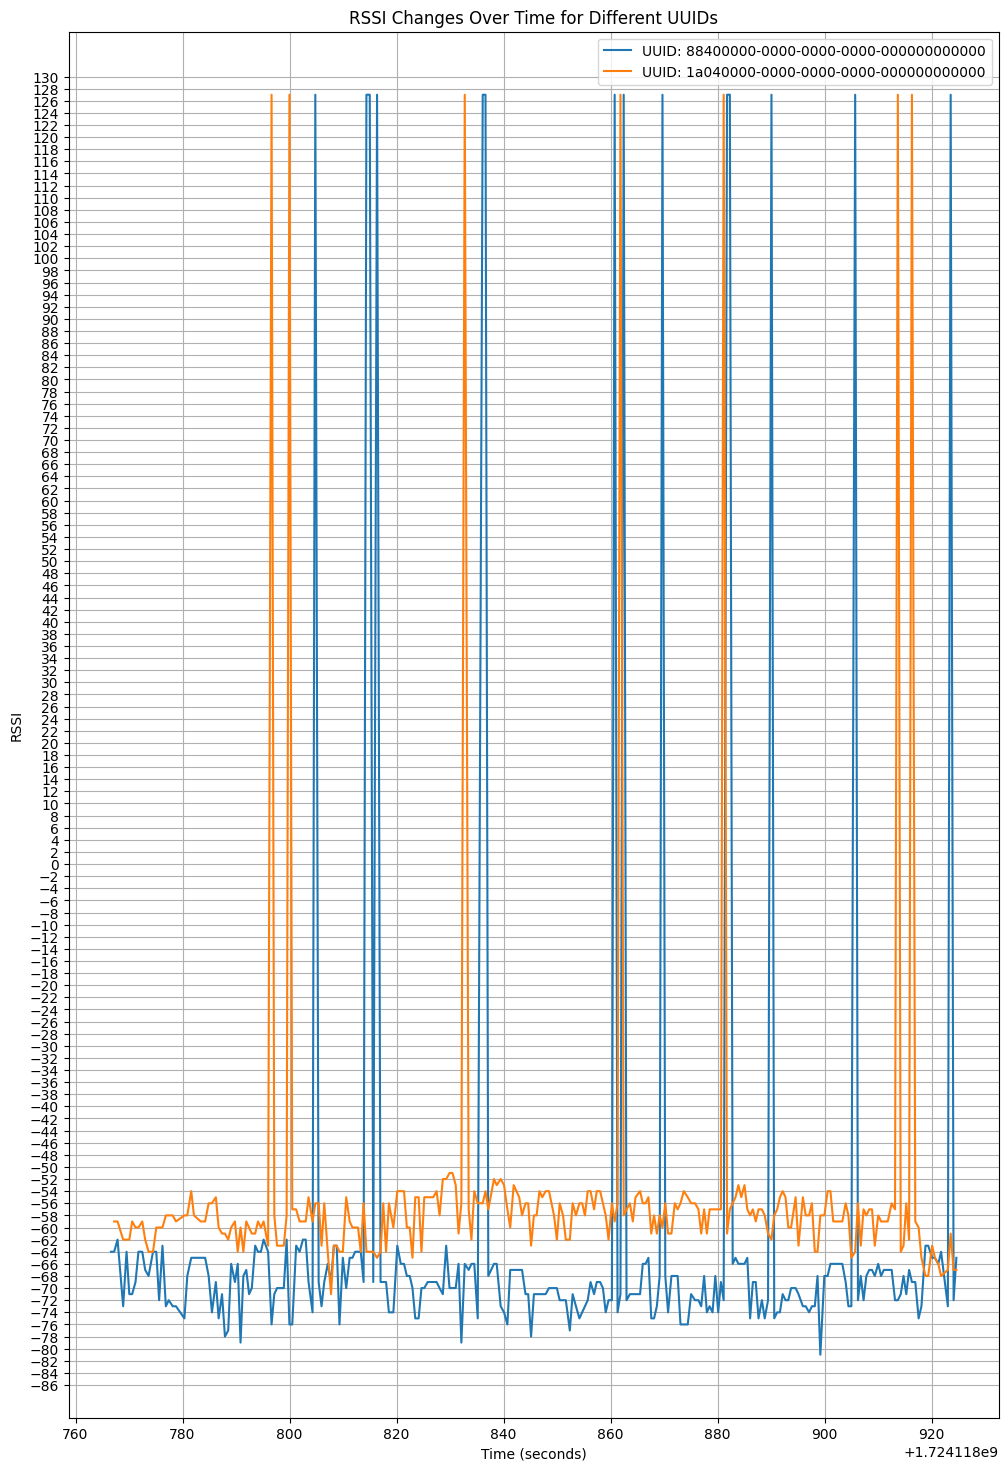

UUID: 88400000-0000-0000-0000-000000000000
  Number of data points: 266
  Min RSSI: -81
  Max RSSI: 127
  Average RSSI: -59.23

UUID: 1a040000-0000-0000-0000-000000000000
  Number of data points: 265
  Min RSSI: -71
  Max RSSI: 127
  Average RSSI: -53.67



In [10]:
# Print RSSI values between adjacent lists in beacon_data
import matplotlib.pyplot as plt

# Create a dictionary to store RSSI values for each UUID
uuid_rssi_data = {}

# Collect RSSI data for each UUID
for data_list in beacon_data:
    for beacon in data_list:
        uuid = beacon['uuid']
        rssi = beacon['rssi']
        time = beacon['time'] / 1000  # Convert milliseconds to seconds
        
        if uuid not in uuid_rssi_data:
            uuid_rssi_data[uuid] = {'time': [], 'rssi': []}
        
        uuid_rssi_data[uuid]['time'].append(time)
        uuid_rssi_data[uuid]['rssi'].append(rssi)

# Plot RSSI changes for each UUID
plt.figure(figsize=(12, 18))

for uuid, data in uuid_rssi_data.items():
    plt.plot(data['time'], data['rssi'], label=f'UUID: {uuid}')

plt.title('RSSI Changes Over Time for Different UUIDs')
plt.xlabel('Time (seconds)')
plt.ylabel('RSSI')
plt.legend()
plt.grid(True)

# Add more detail to y-axis
plt.yticks(range(min(min(data['rssi']) for data in uuid_rssi_data.values()) - 5,
                 max(max(data['rssi']) for data in uuid_rssi_data.values()) + 5,
                 2))  # Increment by 2 for more detail

plt.show()

# Print summary statistics
for uuid, data in uuid_rssi_data.items():
    print(f"UUID: {uuid}")
    print(f"  Number of data points: {len(data['rssi'])}")
    print(f"  Min RSSI: {min(data['rssi'])}")
    print(f"  Max RSSI: {max(data['rssi'])}")
    print(f"  Average RSSI: {sum(data['rssi']) / len(data['rssi']):.2f}")
    print()


In [ ]:
def get_acc_strongest_beacons(beacon_data, beacon_coords):
    strongest_uuids, signal_strengths = process_beacon_data(beacon_data)
    return [beacon_coords[uuid] for uuid in strongest_uuids]

def rssi_to_distance(rssi):
    txPower = -59
    n = 2.0
    return 10 ** ((txPower - rssi) / (10 * n))

In [ ]:
import matplotlib.pyplot as plt




In [ ]:
# Plot the dynamic positions

plt.figure(figsize=(10, 6))

plt.scatter(actual_coords['x'], actual_coords['y'], c='green', label='Actual Coordinates')
plt.scatter(estimated_coords['x'], estimated_coords['y'], c='red', label='Estimated Coordinates')

plt.title('Estimated vs Actual Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()